<a href="https://colab.research.google.com/github/lcbjrrr/quantai/blob/main/E5_Py_Stat_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANOVA (Analysis of Variance)

ANOVA is a statistical test used to compare the means of three or more groups to see if they are significantly different. It works by analyzing the variance within each group and between the groups. If the variance between the groups is much larger than within the groups, it suggests the group means are different. The test uses an F-statistic to measure this difference, and a p-value to determine if the differences are statistically significant. If the p-value is small (usually less than 0.05), it indicates that at least one group is different from the others.

## One-way ANOVA (single factor, multiple categories)

ANOVA test using stats.f_oneway() to compare the means of three groups: type_1, type_0, and type_n. The function checks if there are any significant differences between the average values of the three groups. It returns the F-statistic and the p-value, which indicate whether the differences between the group means are statistically significant. A small p-value (typically less than 0.05) suggests that at least one group is different from the others.

In [ ]:
import scipy.stats as stats
type_1 = [9.67, 8.50, 8.33]
type_0 = [5.00, 5.33, 6.67]
type_n = [7.33, 6.67, 7.99]
stats.f_oneway(type_1,type_0,type_n)

F_onewayResult(statistic=12.903337015732738, pvalue=0.006712726872406345)

<Axes: xlabel='type', ylabel='grade'>

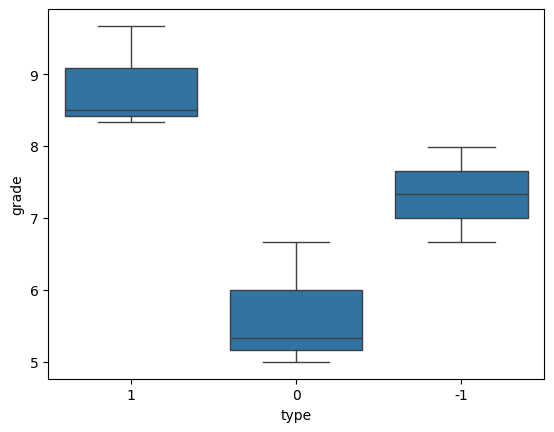

In [45]:
import pandas as pd
import seaborn as sns
grades = pd.DataFrame({
    "type": ['1', '1', '1', '0', '0', '0', '-1', '-1', '-1'],
    "grade": [9.67, 8.50, 8.33, 5.00, 5.33, 6.67, 7.33, 6.67, 7.99]})
sns.boxplot(y='grade',x='type',data=grades)

## Using OLS (and anova_lm)



Let's creates an Ordinary Least Squares (OLS) regression model with ols('grade ~ C(type)', data=grades), where grade is the dependent variable and type is the independent variable. The C(type) indicates that type is a categorical variable. After fitting the model, anova_lm(model, typ=2) performs the ANOVA test and returns a table with the sum of squares, F-statistic, and p-value to determine if there is a significant effect of type on grade.

In [ ]:
import pandas as pd
grades = pd.DataFrame({
    "type": [1, 1, 1, 0, 0, 0, -1, -1, -1],
    "grade": [9.67, 8.50, 8.33, 5.00, 5.33, 6.67, 7.33, 6.67, 7.99]})
grades

,type,grade
0,1,9.67
1,1,8.50
2,1,8.33
3,0,5.00
4,0,5.33
5,0,6.67
6,-1,7.33
7,-1,6.67
8,-1,7.99


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('grade ~ C(type)', data=grades).fit()
anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(type),15.054467,2.0,12.903337,0.006713
Residual,3.500133,6.0,NaN,NaN


## Two-way ANOVA (two or more factors)

 Let's perform a two-way ANOVA, creating an OLS regression model with ols('grade ~ C(type) * C(gender)', data=grades), where grade is the dependent variable, and type and gender are independent variables. The C(type) * C(gender) indicates that both type and gender are categorical variables, and the interaction between them is considered. After fitting the model, anova_lm(model, typ=2) performs the ANOVA test and returns a table showing the sum of squares, F-statistic, and p-value, helping determine if type, gender, or their interaction significantly affects grade.

In [ ]:
import pandas as pd
grades = pd.DataFrame({
    "type": [1, 1, 1, 0, 0, 0, -1, -1, -1],
    "gender":[1,0,0,0,0,1,0,0,1],
    "grade": [9.67, 8.50, 8.33, 5.00, 5.33, 6.67, 7.33, 6.67, 7.99]})
grades

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('grade ~ C(type) * C(gender)', data=grades).fit()
anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(type),15.054467,2.0,78.764213,0.002555
C(gender),3.125000,1.0,32.699686,0.010612
C(type):C(gender),0.088433,2.0,0.462679,0.668133
Residual,0.286700,3.0,NaN,NaN


The ANOVA results show that both type (F = 78.76, p = 0.0026) and gender (F = 32.70, p = 0.0106) have a significant effect on grades, as their p-values are less than 0.05. However, the interaction between type and gender (F = 0.46, p = 0.6681) is not significant, indicating that the combined effect of type and gender on grades is not different from their individual effects. The residual sum of squares is 0.29, representing unexplained variance in the data.